In [3]:
import networkx as nx
import numpy as np
import itertools
import hvplot.networkx as hvnx
import holoviews as hv
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom

In [4]:
#Problem1

G = nx.read_edgelist("connections.txt", create_using = nx.DiGraph(directed = True),nodetype = int) 
print(G)

DiGraph with 4039 nodes and 88234 edges


In [5]:
#Problem2

G_for_bridges = nx.read_edgelist("connections.txt", create_using = nx.Graph(),nodetype = int)
print('Bridges: ', list(nx.bridges(G_for_bridges))[:10]) 

Bridges:  [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210)]


In [6]:
#Problem3

print('Density of the graph: ', nx.density(G))

Density of the graph:  0.0054099817517196435


In [12]:
#Problem4
deg = []
for i in G:
    deg.append((i,G.degree[i]))
print(max(G.nodes, key = G.degree), 'has the highest connections with', deg[107], 'connections') 
print(min(G.nodes, key = G.degree), 'has the lowest connections with', deg[11], 'connections')

107 has the highest connections with (107, 1045) connections
11 has the lowest connections with (11, 1) connections


In [17]:
#Problem5

print(max(G.nodes, key = G.out_degree), 'has the highest outgoing degree')
print(max(G.nodes, key = G.in_degree), 'has the lowest incoming degree')


107 has the highest outgoing degree
1888 has the lowest incoming degree


In [18]:
#Problem6 

closeness = nx.closeness_centrality(G).items()
max_= sorted(closeness, key = lambda pair: pair[1],reverse = True)[0]
print('Highest closeness: ', max_[0]) 

betwenness = nx.betweenness_centrality(G).items()
max_= sorted(betwenness, key = lambda pair: pair[1],reverse = True)[0]
print('Highest betweenness: ', max_[0]) 

vec = nx.eigenvector_centrality(G, max_iter = 700).items()
max_= sorted(vec, key = lambda pair: pair[1],reverse = True)[0]
print('Highest eigenvector: ', max_[0]) 

Highest closeness:  2642
Highest betweenness:  1684
Highest eigenvector:  2655


In [21]:
#Problem7

communities = nxcom.greedy_modularity_communities(G)
print('Number of communities: ', len(communities))
ls = [len(i) for i in communities]
print('Communities: ', ls)

Number of communities:  11
Communities:  [1001, 753, 747, 542, 363, 314, 208, 59, 38, 8, 6]


In [22]:
#Problem8

largest_community = communities[0]
smallest_community = communities[10]
print("Largest community: ",largest_community)
print("Smallest community: ", smallest_community)

Largest community:  frozenset({107, 353, 363, 366, 389, 428, 475, 483, 484, 517, 526, 538, 566, 580, 596, 601, 606, 629, 2678, 637, 641, 2693, 649, 651, 656, 2760, 2764, 2822, 2883, 2941, 896, 897, 898, 899, 900, 902, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 959, 960, 961, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 3057, 1010, 1011, 1012, 1013, 1015, 1014, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054

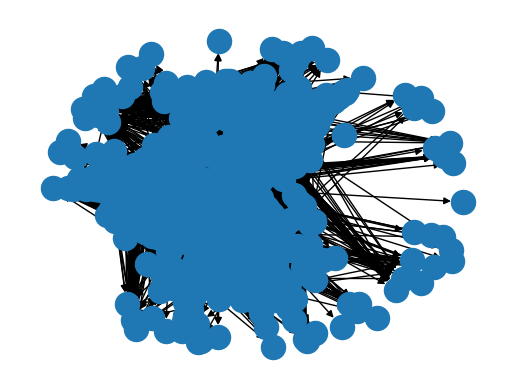

In [32]:
#Problem9

#the 1st largest community
fig, ax = plt.subplots()
nx.draw(G.subgraph(largest_community), ax = ax) 

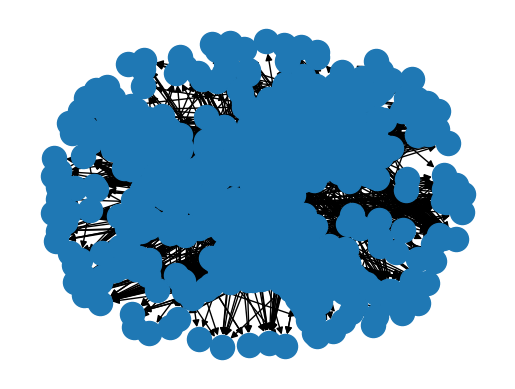

In [31]:
#the 2nd largest community
fig, ax = plt.subplots()
nx.draw(G.subgraph(communities[1]), ax = ax) 

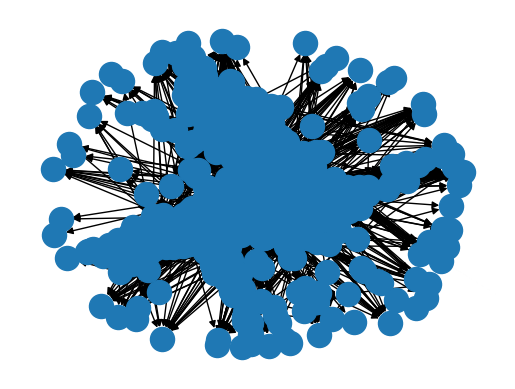

In [34]:
#the 3rd largest community
fig, ax = plt.subplots()
nx.draw(G.subgraph(communities[2]), ax = ax) 

In [35]:
large1 = G.subgraph(largest_community)
large2 = G.subgraph(communities[1])
large3 = G.subgraph(communities[2])

In [38]:
for i in [large1.copy(), large2.copy(), large3.copy()]:
    top = []
    
    degree = nx.degree_centrality(i).items() 
    top.append(sorted(degree, key=lambda pair: pair[1],reverse=True)[0][0]) 

    betwenness = nx.betweenness_centrality(i).items()
    top.append(sorted(betwenness, key=lambda pair: pair[1],reverse=True)[0][0]) 

    closeness = nx.closeness_centrality(i).items()
    top.append(sorted(closeness, key=lambda pair: pair[1],reverse=True)[0][0]) 
    
    i.remove_nodes_from(top) 
    print(len(i.nodes))
    

998
750
744


DiGraph with 1001 nodes and 27057 edges: top node with max betweenness [1086, 0.021008218231951963]
DiGraph with 1001 nodes and 27057 edges: top node with max closeness [1881, 0.3334852652259332]


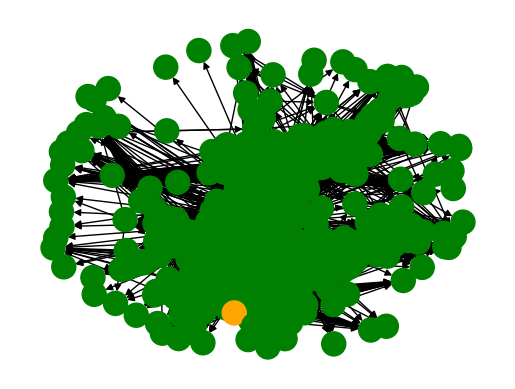

DiGraph with 753 nodes and 7312 edges: top node with max betweenness [3604, 0.012738103698395549]
DiGraph with 753 nodes and 7312 edges: top node with max closeness [3948, 0.15646128576339816]


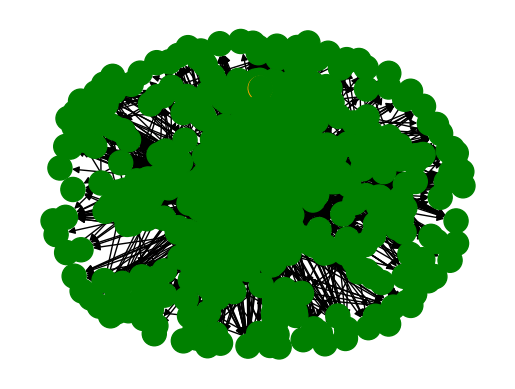

DiGraph with 747 nodes and 14397 edges: top node with max betweenness [2946, 0.029174094184520032]
DiGraph with 747 nodes and 14397 edges: top node with max closeness [3397, 0.3098939790765014]


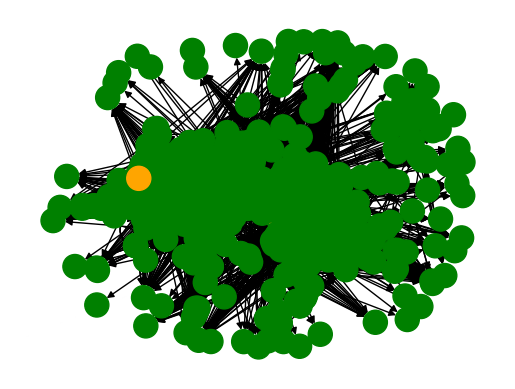

In [45]:
#Problem10

for i in [large1.copy(), large2.copy(), large3.copy()]:
    betwenness = nx.betweenness_centrality(i).items()
    top=sorted(betwenness, key=lambda pair: pair[1],reverse=True)[0]
    top=[i for i in top]
    
    print(f"{i}: top node with max betweenness {top}")
    
    closeness = nx.closeness_centrality(i).items()
    topc=sorted(closeness, key=lambda pair: pair[1],reverse=True)[0]
    topc=[i for i in topc]
    
    top_i = topc + top
    
    
    print(f"{i}: top node with max closeness {topc}")
    color_map= ['orange' if node in top_i else 'green' for node in i.nodes]
    fig, ax = plt.subplots()
    nx.draw(i,node_color=color_map, ax = ax)
    plt.show()

In [3]:
#Problem 11 

# I would spend most of the money on influencers because they will make others interested in the product as they have the highest closeness and betweenness.